In [2]:
import os
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
path = r"./archive/adidas_final/adidas_final.csv"

df = pd.read_csv(
    path
)

In [4]:
# kmeans clustering using tf-idf

from sklearn.feature_extraction.text import TfidfVectorizer
# import underthesea
from sklearn.cluster import KMeans
import numpy as np
from underthesea import word_tokenize

In [5]:
def preprocess_text(text):
    # Tách từ
    text = word_tokenize(text, format="text")
    # Chuyển về chữ thường
    text = text.lower()
    # Loại bỏ ký tự đặc biệt
    text = ''.join(c for c in text if c.isalnum() or c.isspace())
    return text

In [6]:
df['title_processed'] = df['title'].apply(preprocess_text)

processed_docs = [doc for doc in df['title_processed']]

In [7]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(processed_docs)

kmeans = KMeans(n_clusters=5).fit(tfidf_matrix)

# predict cluster
df['cluster'] = kmeans.predict(tfidf_matrix)
    

In [8]:


df.groupby('cluster').size()

cluster
0     413
1     447
2    1481
3    1770
4     313
dtype: int64

In [9]:

# find top 10 words in processed_docs

from collections import Counter

tmp = " ".join(processed_docs)
# find top 10 words
counter = Counter(tmp.split())
top_10_words = counter.most_common(100)

In [10]:
"bra, optime".split(", ")

['bra', 'optime']

In [11]:
AO = ['áo', 'áothun', 'polo', 'tanktop', 'tee', 'áokhoác']
QUAN = ['quần', 'quầnshort', 'quầnlegging', 'short']
SPORT = ['tậpluyện', 'chạy', 'golf', 'training']
FASHION = ['họatiết', 'sọc', 'essentials', 'logo.']
WOMAN = ['bra', 'optime']

In [12]:
AO_condition = \
    df.title_processed.apply(lambda x: any(word in x for word in AO))


AO_df = df[AO_condition]

In [13]:
# remove from df those rows that contain 

df = df[~AO_condition]

In [14]:
# count image in AO_df

images_list = AO_df['images'].tolist()

In [15]:
AO_df['dir'] = AO_df['images'].apply(lambda x: eval(x))

In [16]:
all_dir = []
for dir in AO_df['dir']:
    all_dir.extend(dir)

In [17]:
all_ao_dir = list(set(all_dir))

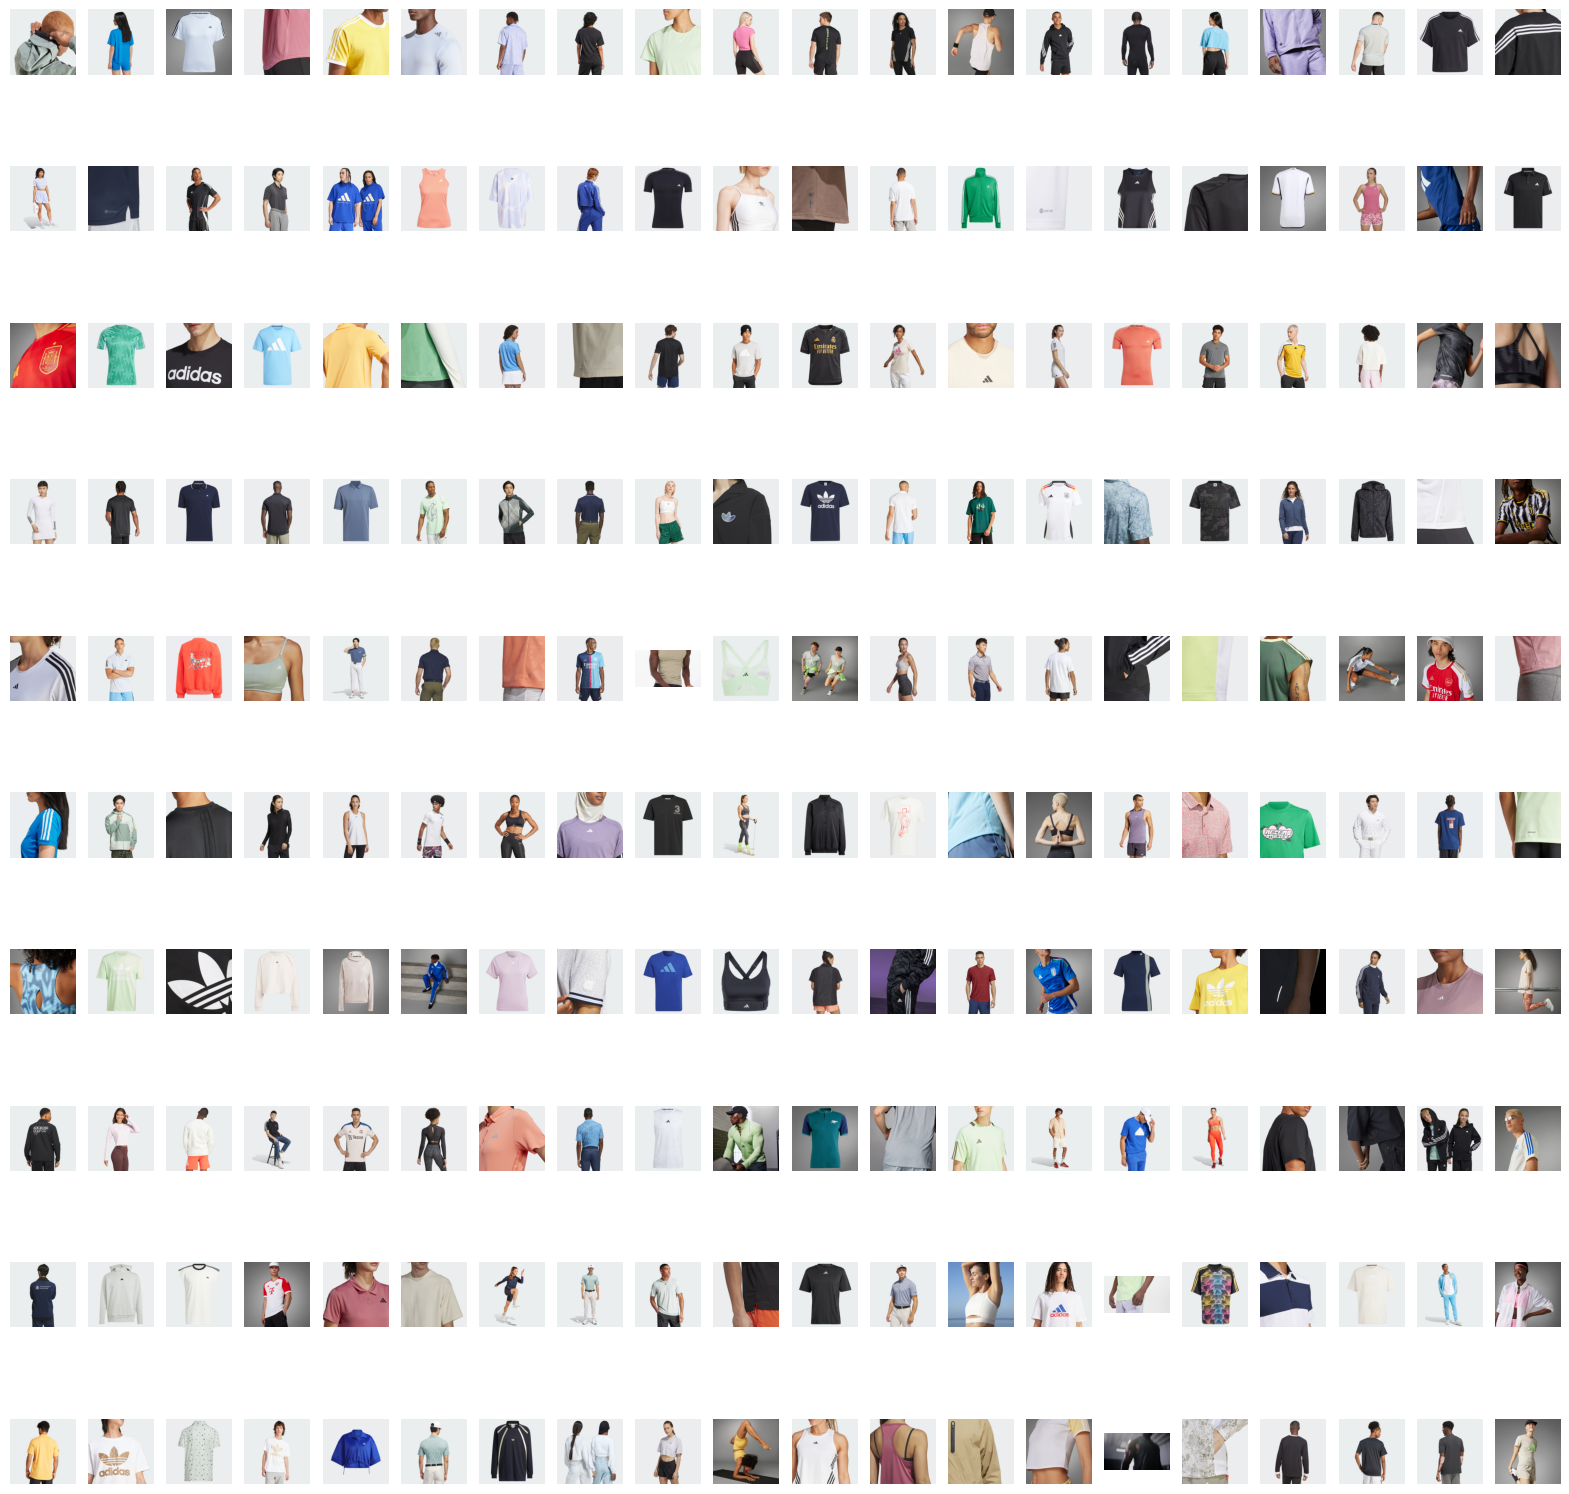

In [18]:
# display images 10 x 10 images in a grid from sample all_ao_dir

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

random.shuffle(all_ao_dir)
add_path = "./archive/adidas_final/adidas/"
fig, axs = plt.subplots(10, 20, figsize=(20, 20))
for i, ax in enumerate(axs.flatten()):
    img = mpimg.imread(add_path + all_ao_dir[i])
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [19]:
QUAN = ['quần', 'quầnshort', 'quầnlegging', 'short']

QUAN_condition = \
    df.title_processed.apply(lambda x: any(word in x for word in QUAN))

QUAN_df = df[QUAN_condition]

In [20]:
df = df[~QUAN_condition]

In [21]:
QUAN_df['dir'] = QUAN_df['images'].apply(lambda x: eval(x))

In [22]:
all_quan_dir = []
for dir in QUAN_df['dir']:
    all_quan_dir.extend(dir)

all_quan_dir = list(set(all_quan_dir))

In [23]:
# create a new folder name ao adidas and quan adidas
# move all images in all_ao_dir to ao adidas and all images in all_quan_dir to quan adidas

import shutil

ao_adidas = "./archive/adidas_final/ao_adidas"
quan_adidas = "./archive/adidas_final/quan_adidas"

if not os.path.exists(ao_adidas):
    os.makedirs(ao_adidas)

if not os.path.exists(quan_adidas):
    os.makedirs(quan_adidas)

for dir in all_ao_dir:
    shutil.move(add_path + dir, ao_adidas)

for dir in all_quan_dir:
    shutil.move(add_path + dir, quan_adidas)

In [24]:
# do the same with nike

path = r"./archive/nike_final/nike_final.csv"

df = pd.read_csv(
    path
)

df['title_processed'] = df['title'].apply(preprocess_text)

processed_docs = [doc for doc in df['title_processed']]

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(processed_docs)

kmeans = KMeans(n_clusters=5).fit(tfidf_matrix)

# predict cluster
df['cluster'] = kmeans.predict(tfidf_matrix)

df.groupby('cluster').size()

cluster
0      19
1    1263
2     188
3     287
4      14
dtype: int64

In [25]:
nike_processed_docs = [doc for doc in df['title_processed']]

counter = Counter(" ".join(nike_processed_docs).split())
top_10_words = counter.most_common(100)

In [26]:
top_10_words

[('nike', 1251),
 ('jordan', 297),
 ('drifit', 267),
 ('sportswear', 197),
 ('essentials', 93),
 ('câulạcbộ', 89),
 ('sport', 81),
 ('swoosh', 59),
 ('một', 55),
 ('bay', 54),
 ('fleece', 53),
 ('sb', 49),
 ('essential', 46),
 ('cừu', 45),
 ('one', 45),
 ('sportswearphoenix', 38),
 ('acg', 38),
 ('mvp', 37),
 ('lông', 35),
 ('2023', 35),
 ('24', 35),
 ('pro', 34),
 ('zenvy', 33),
 ('nikecourt', 29),
 ('paris', 28),
 ('challenger', 28),
 ('victory', 25),
 ('sportswearchill', 25),
 ('của', 25),
 ('365', 24),
 ('2024', 23),
 ('saintgermain', 23),
 ('air', 22),
 ('flight', 22),
 ('sânvậnđộng', 21),
 ('sportsweartech', 21),
 ('miler', 21),
 ('thểthao', 20),
 ('knit', 20),
 ('hỗtrợ', 20),
 ('solo', 20),
 ('chuyến', 19),
 ('họcviện', 19),
 ('liverpool', 19),
 ('nhanh', 18),
 ('hyverse', 18),
 ('rise', 18),
 ('thứ', 17),
 ('cổđiển', 16),
 ('barcelona', 16),
 ('universa', 15),
 ('division', 15),
 ('vậnđộng', 15),
 ('uv', 15),
 ('dna', 15),
 ('23', 14),
 ('hìnhthức', 14),
 ('sportswearpremium', 

In [27]:
nike_ao = [
    'drifit', 'sportswear', 'fleece', 'essential', 'swoosh', 'acg', 'mvp',
    'sportswearphoenix', 'nikecourt', 'victory', 'sportswearchill',
    'sportsweartech', 'miler', 'thểthao', 'sportswearpremium', 'drifituv',
    'nocta', 'jumpman', 'aeroswift', 'drifitadv', 'sportswearclub',
    'windrunner', 'stride'
]

# Từ liên quan đến QUẦN
nike_quan = [
    'pro', 'zenfy', 'knit', 'rise', 'trail', 'division', 'unlimited', 'indy',
    'classic', 'brooklynlông'
]

In [28]:
nike_ao_condition = \
    df.title_processed.apply(lambda x: any(word in x for word in nike_ao))

nike_ao_df = df[nike_ao_condition]

In [29]:
nike_ao_df['dir'] = nike_ao_df['imgs'].apply(lambda x: eval(x))

/var/folders/rg/x56r1snd7l3fh_xy8rryvzpr0000gn/T/ipykernel_50495/2740779301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nike_ao_df['dir'] = nike_ao_df['imgs'].apply(lambda x: eval(x))


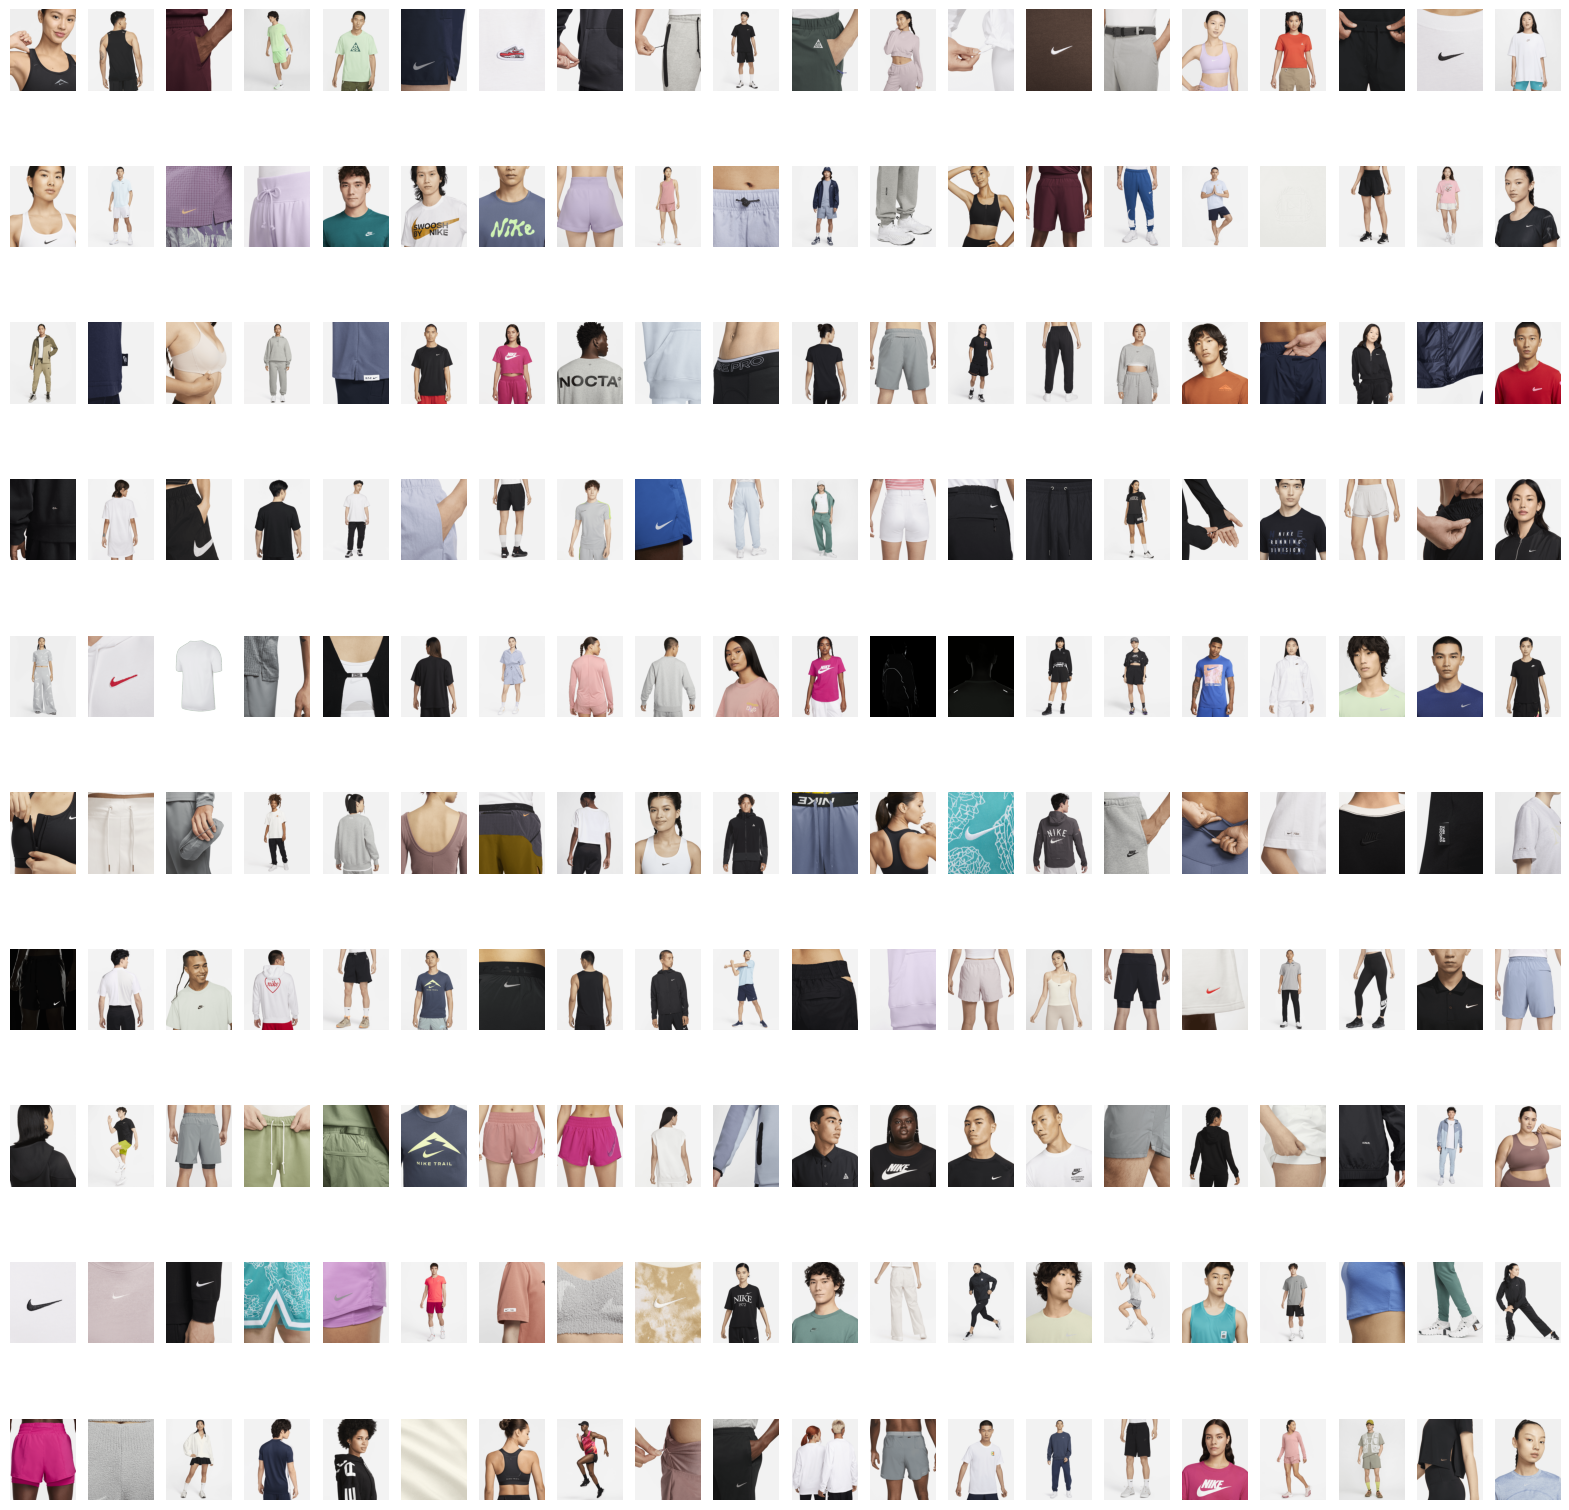

In [30]:
all_nike_ao_dir = []
for dir in nike_ao_df['dir']:
    all_nike_ao_dir.extend(dir)

nike_path = "./archive/nike_final/nike/"

all_nike_ao_dir = list(set(all_nike_ao_dir))

fig, axs = plt.subplots(10, 20, figsize=(20, 20))
for i, ax in enumerate(axs.flatten()):
    img = mpimg.imread(nike_path + all_nike_ao_dir[i])
    ax.imshow(img)
    ax.axis('off')

plt.show()

In [31]:
# do the same with yame

path = r"./archive/yame_final/yame_final.csv"

df = pd.read_csv(
    path
)

In [32]:
df['title_processed'] = df['title'].apply(preprocess_text)

yame_processed_docs = [doc for doc in df['title_processed']]

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(yame_processed_docs)

kmeans = KMeans(n_clusters=5).fit(tfidf_matrix)

# predict cluster
df['cluster'] = kmeans.predict(tfidf_matrix)

df.groupby('cluster').size()

yame_processed_docs = [doc for doc in df['title_processed']]

counter = Counter(" ".join(yame_processed_docs).split())

top_10_words = counter.most_common(100)

for idx, word in enumerate(top_10_words, start=1):
    print(f"{idx}: {word}", end=", ")
    if idx % 20 == 0:
        print("")

1: ('áo', 575), 2: ('đơngiản', 470), 3: ('vừa', 394), 4: ('trơndáng', 352), 5: ('chiều', 348), 6: ('cotton', 346), 7: ('thuncổ', 323), 8: ('tròntay', 322), 9: ('biểutượngdáng', 311), 10: ('ngắnvải', 298), 11: ('thiếtkế', 251), 12: ('2', 232), 13: ('thấmhút', 216), 14: ('rộngbst', 199), 15: ('rộng', 196), 16: ('bẻtay', 172), 17: ('cogiãn', 142), 18: ('y2010originals', 142), 19: ('áokhoác', 139), 20: ('đơngiảngu', 132), 
21: ('màudáng', 125), 22: ('sơmicổ', 124), 23: ('4', 123), 24: ('nhântạo', 122), 25: ('ngắnsợi', 104), 26: ('nónvải', 99), 27: ('nostyle', 94), 28: ('premium', 86), 29: ('thoángmát', 84), 30: ('tốigiản', 83), 31: ('polocổ', 79), 32: ('có', 77), 33: ('không', 69), 34: ('dàivải', 64), 35: ('bst', 52), 36: ('lưnggài', 51), 37: ('dàisợi', 46), 38: ('chống', 46), 39: ('đứng', 46), 40: ('dù', 42), 
41: ('thấmhútphối', 41), 42: ('thungiữ', 41), 43: ('quầnjean', 41), 44: ('ống', 41), 45: ('vảithun', 39), 46: ('thedayseye', 38), 47: ('nón', 38), 48: ('tayngắn', 37), 49: ('nắng', 

In [33]:
yame_quan = [
    'quần jean', 'quần short', 'quần dài', 
    'thun ống', 'lưng gài', 'quần'
]
# ignore case
yame_quan_condition = \
    df.title_processed.apply(lambda x: any(word in x for word in yame_quan))

yame_quan_df = df[yame_quan_condition]

In [34]:
yame_quan_df.shape

(102, 6)

In [35]:
yame_quan_df['dir'] = yame_quan_df['img_list'].apply(lambda x: eval(x))

all_yame_quan_dir = []
for dir in yame_quan_df['dir']:
    all_yame_quan_dir.extend(dir)

/var/folders/rg/x56r1snd7l3fh_xy8rryvzpr0000gn/T/ipykernel_50495/841483275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yame_quan_df['dir'] = yame_quan_df['img_list'].apply(lambda x: eval(x))


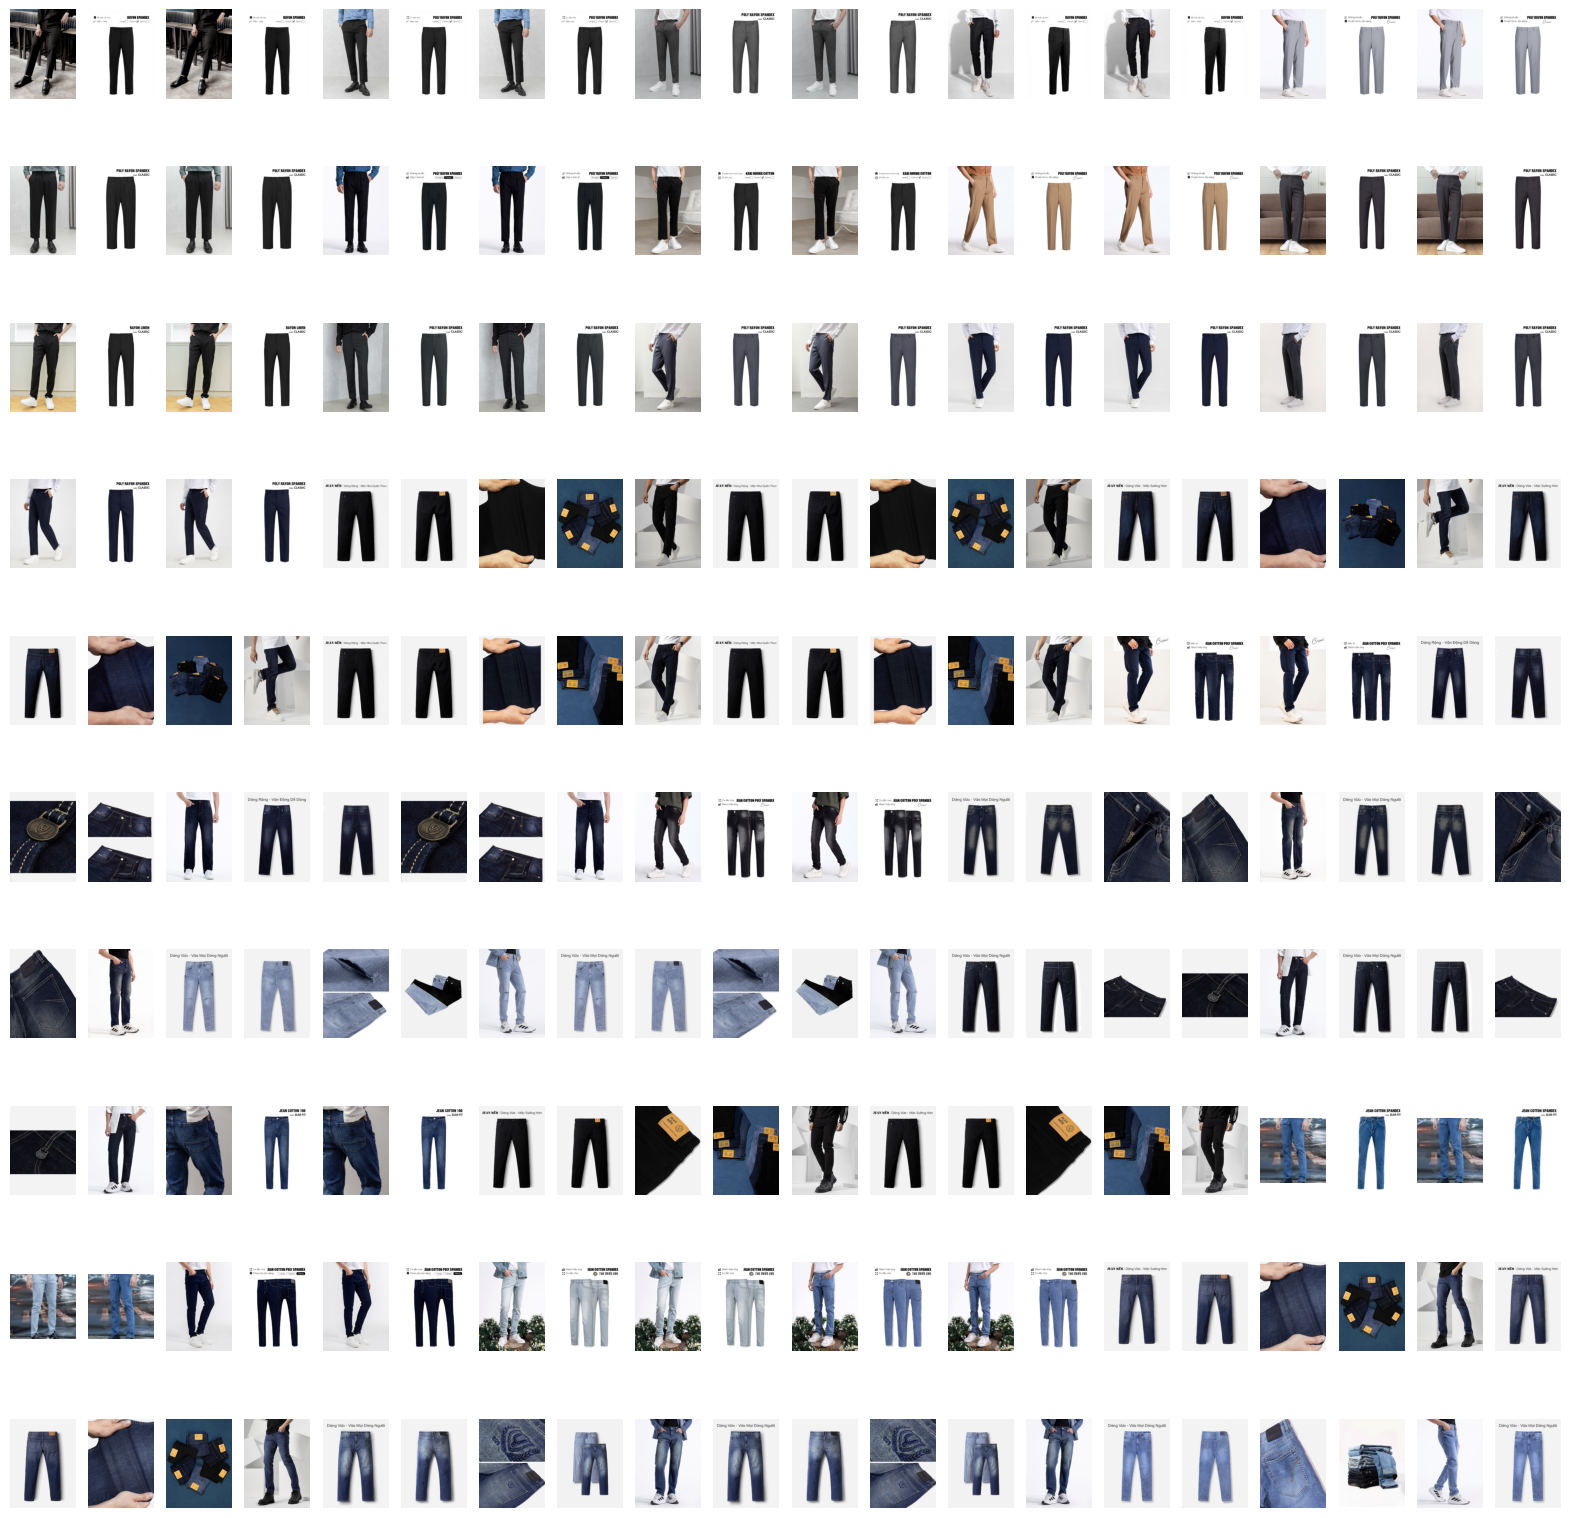

In [36]:
# show images in all_yame_quan_dir

yame_path = "./archive/yame_final/yame/"

fig, axs = plt.subplots(10, 20, figsize=(20, 20))

for i, ax in enumerate(axs.flatten()):
    img = mpimg.imread(yame_path + all_yame_quan_dir[i])
    ax.imshow(img)
    ax.axis('off')

plt.show()

In [37]:
# move all images in all_yame_quan_dir to quan_yame

quan_yame = "./archive/yame_final/quan_yame"

if not os.path.exists(quan_yame):
    os.makedirs(quan_yame)

for dir in set(all_yame_quan_dir):
    # if file exists 
    try:
        shutil.move(yame_path + dir, quan_yame)
    except:
        pass
    

In [38]:
ao_yame = [
    'áo', 'thun cổ', 'tròn tay', 'bẻ tay', 'áo khoác',
    'sơ mi cổ', 'polo cổ', 'tay ngắn',
    'thun cổ tròn', 'graphic tee'
]

# ignore case
ao_yame_condition = \
    df.title_processed.apply(lambda x: any(word in x.lower() for word in ao_yame))

ao_yame_df = df[ao_yame_condition]

ao_yame_df.shape

(714, 6)

In [39]:
ao_yame_df['dir'] = ao_yame_df['img_list'].apply(lambda x: eval(x))

all_ao_yame_dir = []

for dir in ao_yame_df['dir']:
    all_ao_yame_dir.extend(dir)

all_ao_yame_dir = list(set(all_ao_yame_dir))

/var/folders/rg/x56r1snd7l3fh_xy8rryvzpr0000gn/T/ipykernel_50495/1201610071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ao_yame_df['dir'] = ao_yame_df['img_list'].apply(lambda x: eval(x))


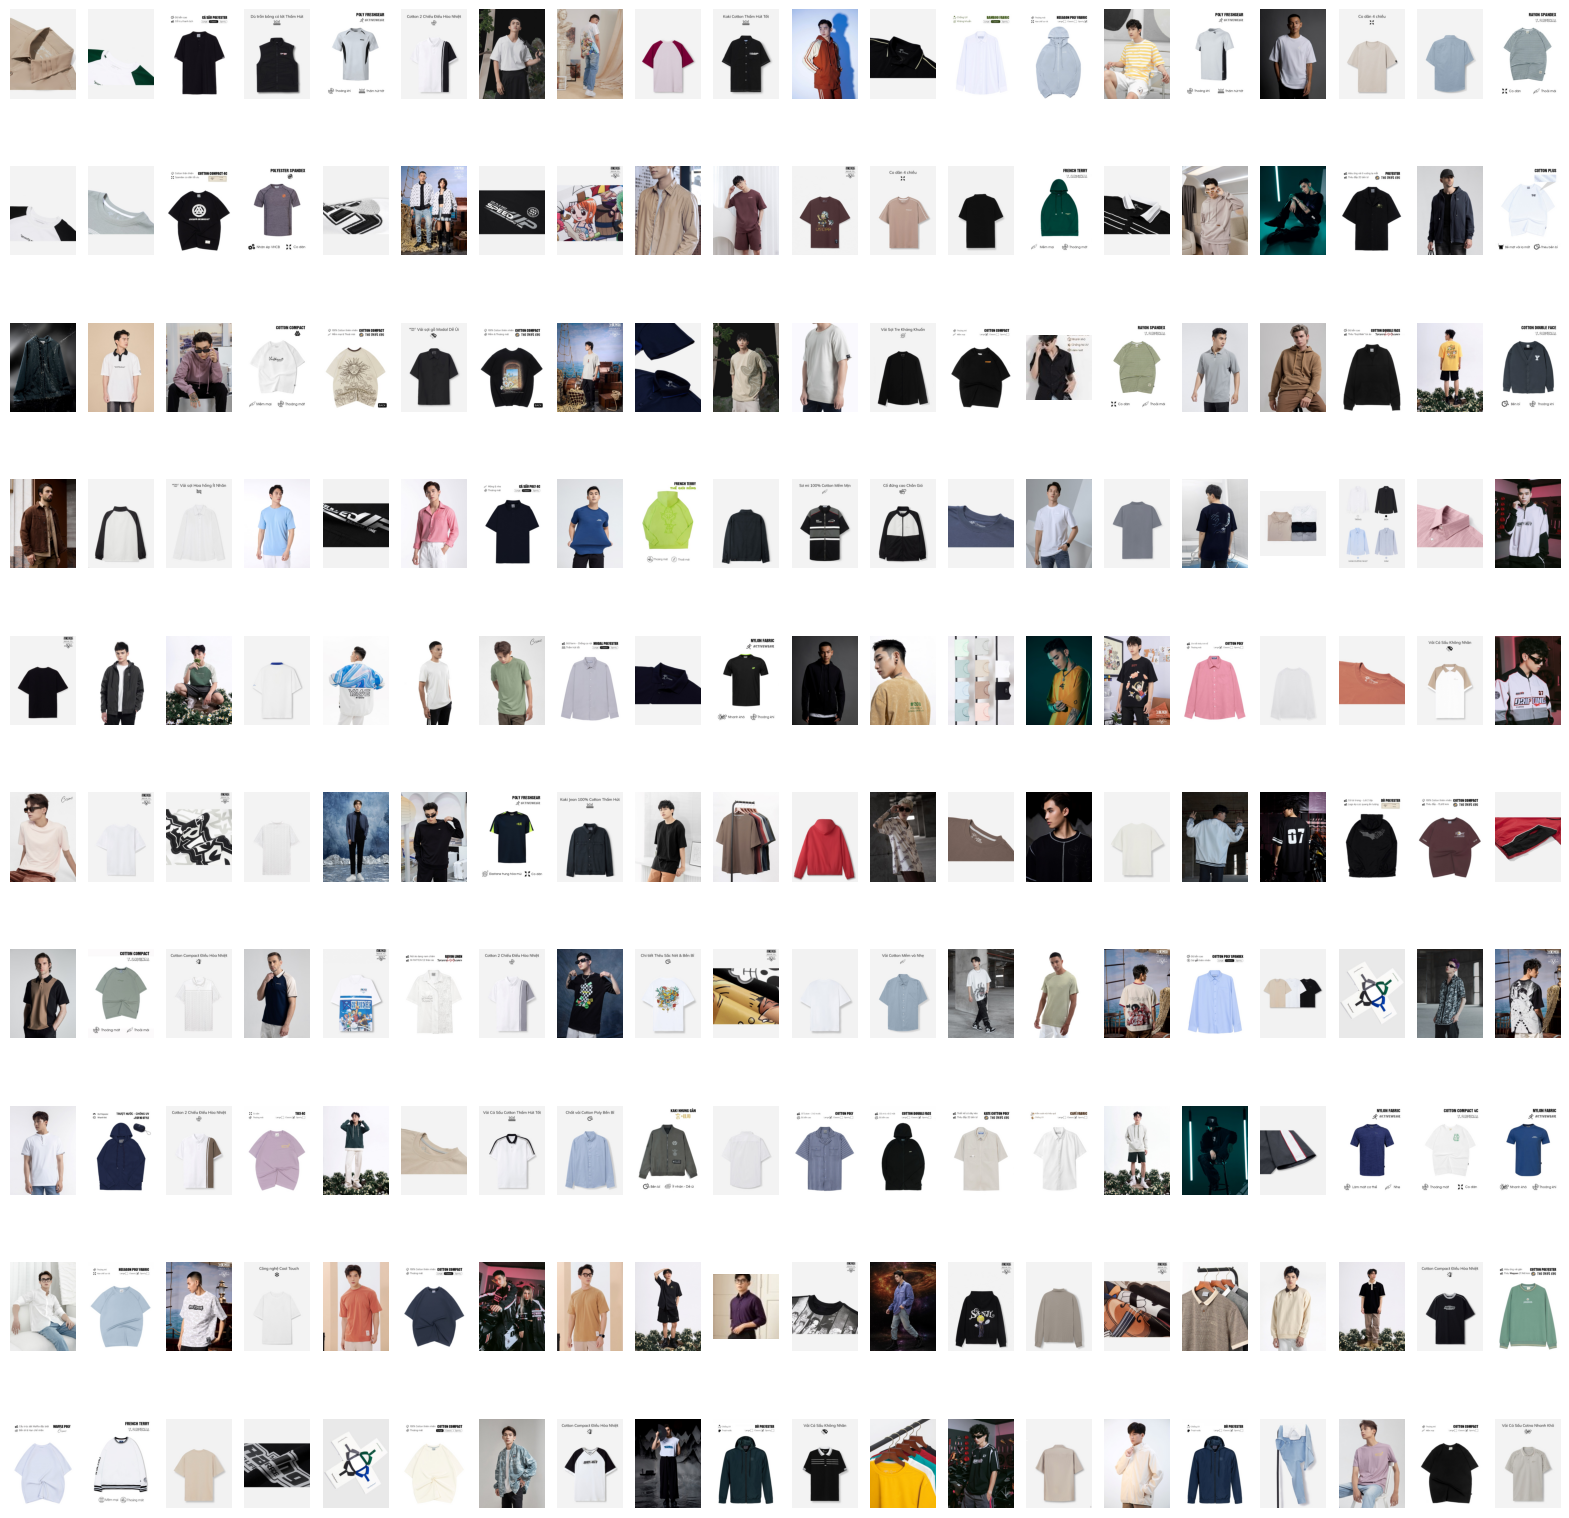

In [40]:
# display all images in all_ao_yame_dir

fig, axs = plt.subplots(10, 20, figsize=(20, 20))

for i, ax in enumerate(axs.flatten()):
    img = mpimg.imread(yame_path + all_ao_yame_dir[i])
    ax.imshow(img)
    ax.axis('off')

plt.show()

In [41]:
# move all images in all_ao_yame_dir to ao_yame

ao_yame = "./archive/yame_final/ao_yame"

if not os.path.exists(ao_yame):
    os.makedirs(ao_yame)

for dir in all_ao_yame_dir:
    shutil.move(yame_path + dir, ao_yame)

In [42]:
# uniqlo 

path = r"./archive/uniqlo_final/uniqlo_final.csv"

df = pd.read_csv(
    path
)

df.head()

title  \
0                             Áo Thun Cổ Thuyền Không Tay   
1            AIRism Áo Thun Không Đường May Cổ V Dáng Dài   
2                  Áo Thun SUPIMA COTTON Cổ Tròn Ngắn Tay   
3                       Áo Thun Vải Crepe Jersey Ngắn Tay   
4  Áo Thun Vải Gân Mềm Cổ Tròn Ngắn Tay (Họa Tiết Kẻ Sọc)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    description  \
0                                                                                                                                                                                                                                                              - Cotton rib fabric creates a comfortable fit. \n- Sleek boat neck design with a moderately fitted feel. \n- Updated armhole design provides more coverage. \n- Slightly longer length looks great tucked in or out. \n- Inspired by ’90s style.   
1                                                                                                                                                                                                                                                                     - Chất liệu vải tạo cảm giác sang trọng. \n- 'AIRism' hiệu suất cao. \n- Chiều dài qua hông. \n- Thiết kế đuôi áo tôn dáng với thiết kế không đường may. \n- Thích hợp để tập yoga, chơi những môn thể thao nhẹ nhàng và mặc thường ngày.   
2  Bộ sưu tập Uniqlo U là sự hiện thực hóa của một nhóm các nhà thiết kế quốc tế tận tâm và lành nghề có trụ sở tại Trung tâm Nghiên cứu và Phát triển Paris do Giám đốc Nghệ thuật Christophe Lemaire chỉ đạo.\n\n- 100% cotton SUPIMA®. \n- Kiểu dáng cổ điển giản dị tinh tế bằng vải cotton SUPIMA® cao cấp. \n- Cập nhật để có kiểu dáng thon gọn hơn. \n- Chiều dài phần thân dài hơn một chút. \n- Chiều dài tay áo dài hơn một chút phù hợp với mọi dáng người. \n- Thiết kế cổ tròn với đường gân hẹp.   
3                                                                                                                                                      Một tủ quần áo hiện đại dành riêng cho bạn đến từ nhà thiết kế nổi tiếng người Anh Clare Waight Keller, được biết đến là một nhà thết kế được các hãng thời trang hàng đầu trên thế giới, giới mộ điệu đánh giá cao.\n\n- Vải crepe đặc biệt. \n- Chất liệu vải dễ chăm sóc với vẻ ngoài cao cấp. \n- Chiều dài đã được thu gọn. \n- Kiểu dáng hình hộp.   
4                                                                                                                                                                                                                                                                                                                       - Chất liệu thun gân pha cotton co giãn mang lại cảm giác mềm mại, cao cấp. \n- Kiểu dáng thon gọn, bóng bẩy. \n- Thiết kế sọc đa năng. \n- Một sản phẩm cần thiết trong tủ đồ của bạn.   

                                                               color  \
0                   ['WHITE', 'BLACK', 'PINK', 'DARK BROWN', 'BLUE']   
1               ['WHITE', 'BLACK', 'BROWN', 'LIGHT GREEN', 'PURPLE']   
2  ['WHITE', 'GRAY', 'BLACK', 'PINK', 'DARK BROWN', 'CREAM', 'NAVY']   
3                                         ['BLACK', 'GREEN', 'BLUE']   
4                                              ['OFF WHITE', 'NAVY']   

                                                                                                                                                                          img_list  
0                                                    ['vngoods_00_468625.jpg

In [43]:
df['title_processed'] = df['title'].apply(preprocess_text)

uniqlo_processed_docs = [doc for doc in df['title_processed']]

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(uniqlo_processed_docs)

kmeans = KMeans(n_clusters=5).fit(tfidf_matrix)

# predict cluster
df['cluster'] = kmeans.predict(tfidf_matrix)

df.groupby('cluster').size()

cluster
0     24
1      4
2    232
3     30
4    118
dtype: int64

In [44]:
counter = Counter(" ".join(uniqlo_processed_docs).split())

top_10_words = counter.most_common(100)

for idx, word in enumerate(top_10_words, start=1):
    print(f"{idx}: {word}", end=", ")
    if idx % 20 == 0:
        print("")

1: ('tay', 222), 2: ('ngắn', 115), 3: ('áo', 108), 4: ('ut', 94), 5: ('áothun', 74), 6: ('quần', 45), 7: ('thunngắn', 41), 8: ('chống', 33), 9: ('airism', 31), 10: ('dài', 30), 11: ('chân', 24), 12: ('nắng', 22), 13: ('không', 21), 14: ('kiểu', 18), 15: ('đầm', 17), 16: ('sơmi', 16), 17: ('áokhoác', 15), 18: ('vải', 15), 19: ('peace', 15), 20: ('forall', 15), 
21: ('peanutsáo', 14), 22: ('váyvải', 14), 23: ('nếp', 14), 24: ('họatiết', 13), 25: ('linen', 13), 26: ('dàivải', 13), 27: ('giãn', 13), 28: ('cottonáo', 12), 29: ('uv', 12), 30: ('popmart', 12), 31: ('rộng', 11), 32: ('denim', 10), 33: ('linencotton', 10), 34: ('mắt', 9), 35: ('th', 9), 36: ('sanriocharacters', 9), 37: ('có', 9), 38: ('xếpnếp', 8), 39: ('linenpha', 8), 40: ('bộ', 8), 
41: ('cotton', 8), 42: ('quầndài', 8), 43: ('đến', 8), 44: ('thắtlưng', 8), 45: ('cottondáng', 8), 46: ('xếp', 8), 47: ('mickeystands', 8), 48: ('vảilinen', 7), 49: ('disneycollection', 7), 50: ('miniáo', 7), 51: ('parkachống', 7), 52: ('bỏtúi', 7

In [45]:
uniqlo_ao = [
    'tay', 'áo', 'áothun', 'thunngắn', 'sơmi',
    'áokhoác', 'cottonáo', 'uv','miniáo', 'momaáo', 'anniversaryáo', 'ngắntay'
]


uniqlo_ao_condition = \
    df.title_processed.apply(lambda x: any(word in x for word in uniqlo_ao))

uniqlo_ao_df = df[uniqlo_ao_condition]

uniqlo_ao_df.shape

(284, 6)

/var/folders/rg/x56r1snd7l3fh_xy8rryvzpr0000gn/T/ipykernel_50495/1400602772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniqlo_ao_df['dir'] = uniqlo_ao_df['img_list'].apply(lambda x: eval(x))


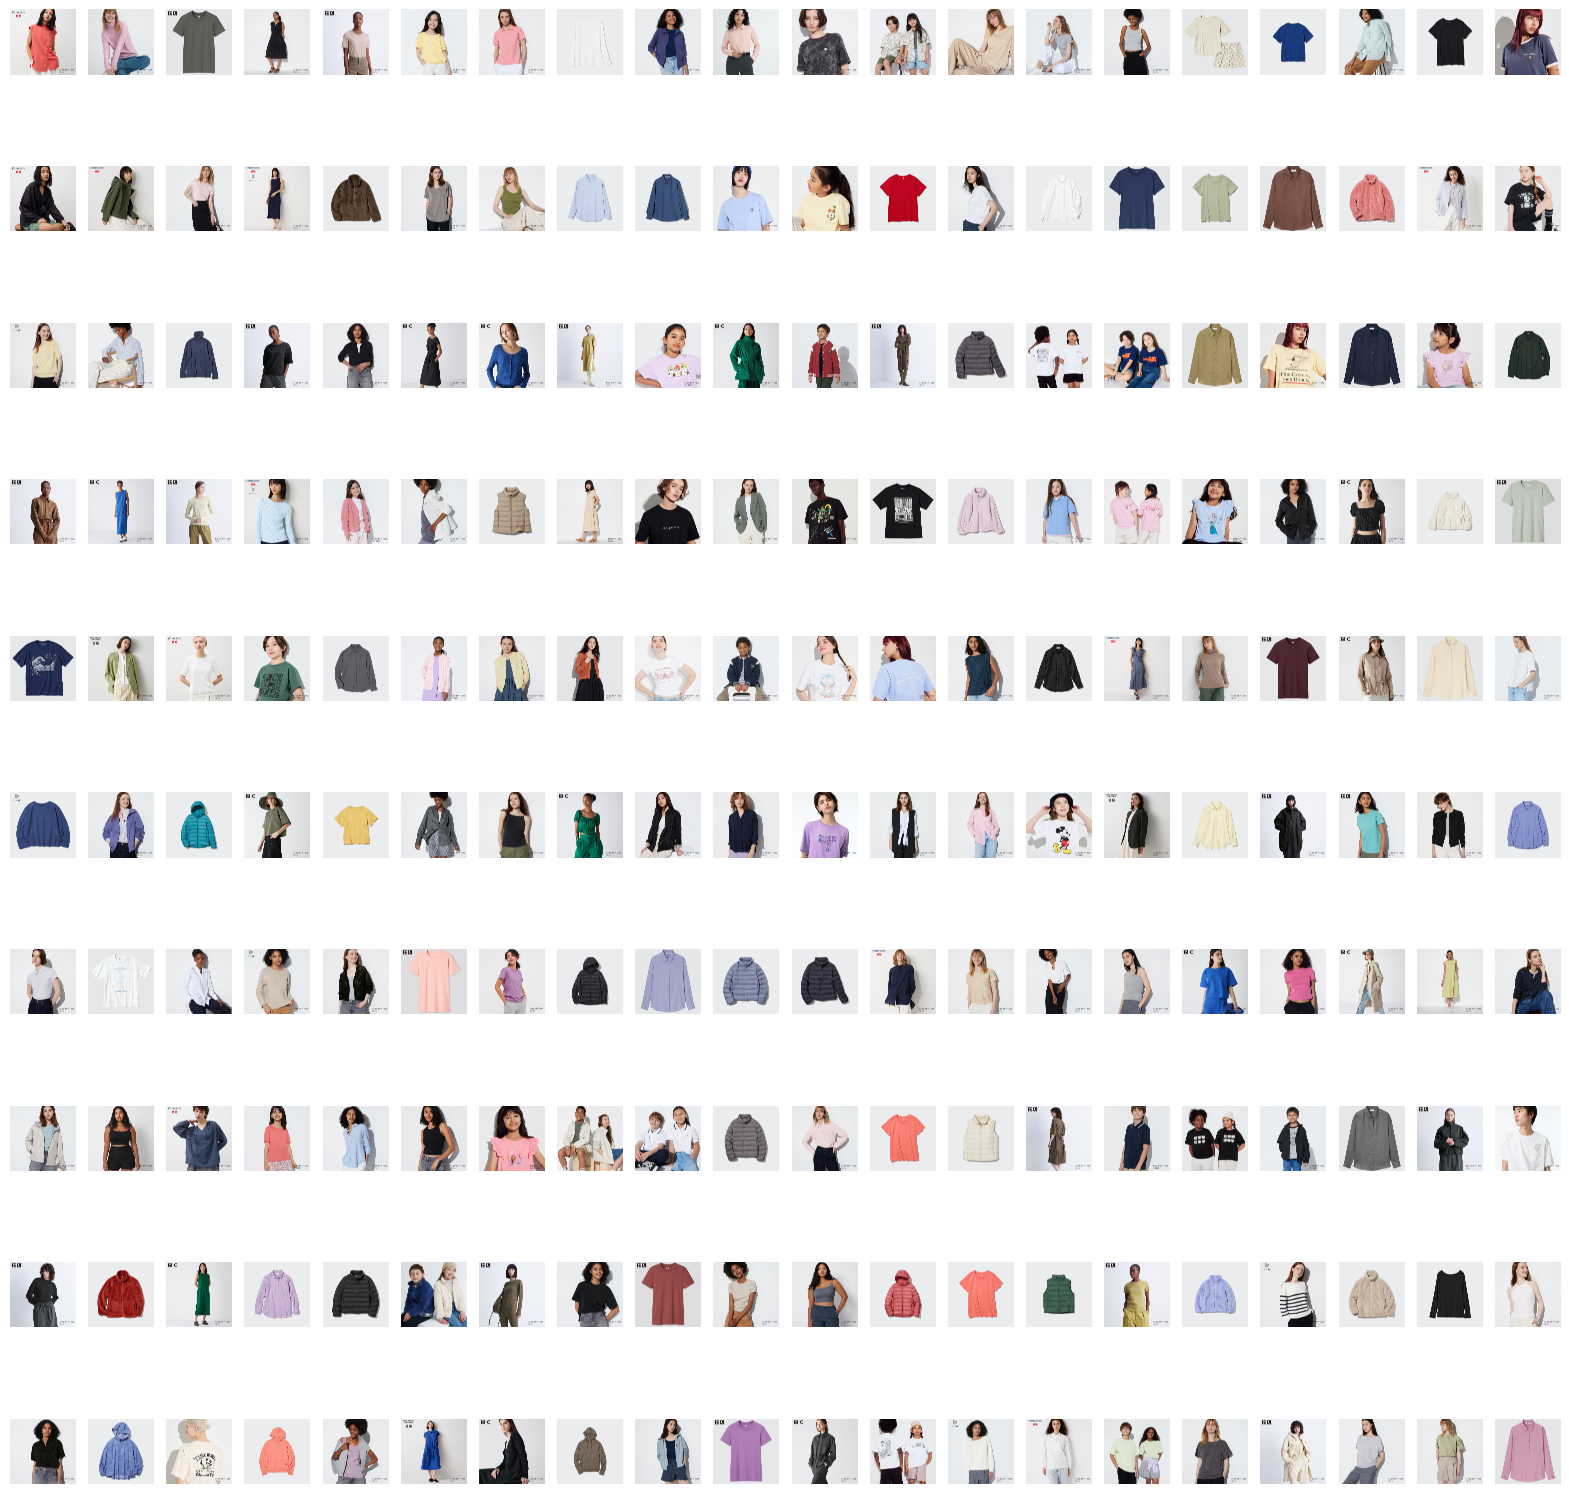

In [46]:
uniqlo_ao_df['dir'] = uniqlo_ao_df['img_list'].apply(lambda x: eval(x))

all_uniqlo_ao_dir = []
for dir in uniqlo_ao_df['dir']:
    all_uniqlo_ao_dir.extend(dir)

all_uniqlo_ao_dir = list(set(all_uniqlo_ao_dir))

# display all images in all_uniqlo_ao_dir

uniqlo_path = "./archive/uniqlo_final/uniqlo/"

fig, axs = plt.subplots(10, 20, figsize=(20, 20))

for i, ax in enumerate(axs.flatten()):
    img = mpimg.imread(uniqlo_path + all_uniqlo_ao_dir[i])
    ax.imshow(img)
    ax.axis('off')

plt.show()

In [47]:
# move all images in all_uniqlo_ao_dir to ao_uniqlo

ao_uniqlo = "./archive/uniqlo_final/ao_uniqlo"

if not os.path.exists(ao_uniqlo):
    os.makedirs(ao_uniqlo)

for dir in all_uniqlo_ao_dir:
    shutil.move(uniqlo_path + dir, ao_uniqlo)

In [48]:
uniqlo_quan =  [
    'quần', 'chân', 'quầndài', 'denim', 'thắtlưng', 'quầnjeans', 'quầneasy', 'cargo', 'ốngôm', 'relaxdài'
]

uniqlo_quan_condition = \
    df.title_processed.apply(lambda x: any(word in x for word in uniqlo_quan))

uniqlo_quan_df = df[uniqlo_quan_condition]

uniqlo_quan_df.shape

df = df[~uniqlo_quan_condition]

In [49]:
uniqlo_quan_df['dir'] = uniqlo_quan_df['img_list'].apply(lambda x: eval(x))

all_uniqlo_quan_dir = []
for dir in uniqlo_quan_df['dir']:
    all_uniqlo_quan_dir.extend(dir)

In [50]:
# move all images in all_uniqlo_quan_dir to quan_uniqlo

quan_uniqlo = "./archive/uniqlo_final/quan_uniqlo"

if not os.path.exists(quan_uniqlo):
    os.makedirs(quan_uniqlo)

for dir in all_uniqlo_quan_dir:
    try:
        shutil.move(uniqlo_path + dir, quan_uniqlo)
    except:
        pass

In [51]:
df = df[~uniqlo_ao_condition]

/var/folders/rg/x56r1snd7l3fh_xy8rryvzpr0000gn/T/ipykernel_50495/1330327604.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~uniqlo_ao_condition]
